# Deterministic VS Stochastic
내가 있는 상황은 항상 원하는대로 진행되지 않는다. We are in ***Stochastic***.

So Q-learning does not working anymore.

In Stochastic world
* Listen to Q(s') (just a little bit)
* Update Q(s) little bit (learning rate)

$$Q(s,a) =(1-\alpha ) Q(s,a) + \alpha [r+\gamma max Q(s',a')]$$



Success rate: 0.523
Final Q-Table Values
LEFT DOWN RIGHT UP
[[4.12371946e-01 1.26925747e-02 1.15915473e-02 1.26769156e-02]
 [4.16278065e-05 2.21462363e-03 2.12465782e-03 6.00564824e-01]
 [2.33531995e-04 4.35264295e-01 2.94946667e-03 1.13893627e-02]
 [9.43669701e-06 1.74851237e-03 1.81040114e-03 2.93602086e-01]
 [2.08572235e-01 1.52912100e-03 1.49704555e-03 1.60126320e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.99916331e-01 1.14953023e-06 2.66704590e-04 5.84032873e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.85082279e-04 5.66741714e-04 1.02233682e-03 5.94778219e-02]
 [4.75548441e-04 2.31515653e-01 1.47872902e-03 0.00000000e+00]
 [6.04446737e-01 5.50556249e-04 1.55012658e-04 2.12555685e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.35984656e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.49520142e-01 0.00000000e

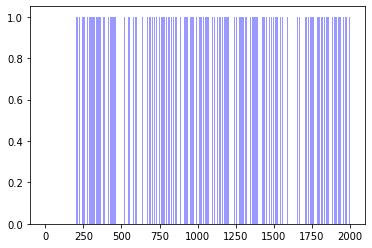

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

# register(
#     id='FrozenLake-v3',
#     entry_point='gym.envs.toy_text:FrozenLakeEnv',
#     kwargs={'map_name' : '4x4', 'is_slippery': True}
# )
env = gym.make('FrozenLake-v0')

Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = .99
learing_rate = 0.85
num_episodes = 2000

rewardList = []
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False

    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        new_state, reward, done, _ = env.step(action)

        Q[state, action] = (1-learing_rate)*Q[state,action] + learing_rate*(reward + dis * np.max(Q[new_state,:]))

        rAll += reward
        state = new_state
    rewardList.append(rAll)

print("Success rate: " + str(sum(rewardList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rewardList)), rewardList, color='b', alpha=0.4)
plt.show()